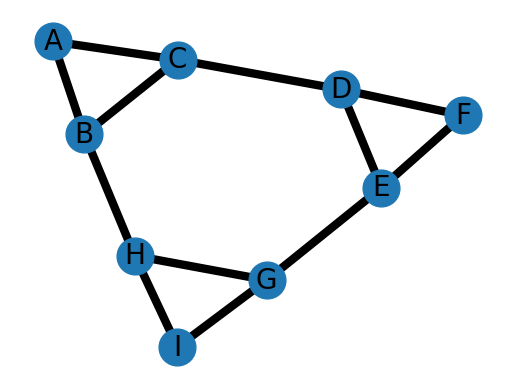

In [1]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
import community
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt


# Create the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])

# Add edges
edges = [
    ('A', 'B'), 
    ('A', 'C'), 
    ('B', 'C'), 
    
    ('B', 'H'), 
    ('H', 'I'), 
    ('H', 'G'), 
    ('I', 'G'),

    ('C', 'D'),
    ('D', 'F'),
    ('F', 'E'),
    ('D', 'E'),


    ('G', 'E'),
    
]

G.add_edges_from(edges)

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=6)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

plt.axis('off')
plt.show()

In [4]:

# Find communities using Girvan-Newman
comp = girvan_newman(G)
communities_girvan_newman = next(comp)

print("Communities found using Girvan-Newman algorithm:")
for c in communities_girvan_newman:
    print(c)

# Find communities using Louvain algorithm
partition = community.community_louvain.best_partition(G)
communities_louvain = {}
for node, com in partition.items():
    if com not in communities_louvain:
        communities_louvain[com] = [node]
    else:
        communities_louvain[com].append(node)

print("\nCommunities found using Louvain algorithm:")
for com, nodes in communities_louvain.items():
    print(nodes)

# Find communities using greedy modularity communities algorithm
communities_greedy_modularity = list(greedy_modularity_communities(G))



Communities found using Girvan-Newman algorithm:
{'A', 'C', 'B'}
{'D', 'E', 'I', 'F', 'G', 'H'}

Communities found using Louvain algorithm:
['A', 'B', 'C']
['D', 'E', 'F']
['G', 'H', 'I']
